- construire un chatbot pour que les collaborateurs internes puissent facilement réserver un billet d’avion pour leurs prochaines vacances.
- La V1 devra pouvoir identifier dans la demande de l’utilisateur les cinq éléments suivants :
    - Ville de départ
    - Ville de destination
    - Date aller souhaitée du vol
    - Date retour souhaitée du vol
    - Budget maximum pour le prix total des billets
    
Les données:
- historiques d’échange entre un chatbot et un utilisateur.

In [1]:
FRAMES_DATA = 'data/frames/frames.json'

# Library importation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import utils as utl

In [3]:
import json, time, uuid

# Loading Dataset

In [4]:
## Load the dataset in a Pandas Dataframe (in memory)
data = pd.read_json(FRAMES_DATA)

## Describing data 

In [5]:
data.head()

,user_id,turns,wizard_id,id,labels
0,U22HTHYNP,[{'text': 'I'd like to book a trip to Atlantis...,U21DKG18C,e2c0fc6c-2134-4891-8353-ef16d8412c9a,"{'userSurveyRating': 4.0, 'wizardSurveyTaskSuc..."
1,U21E41CQP,"[{'text': 'Hello, I am looking to book a vacat...",U21DMV0KA,4a3bfa39-2c22-42c8-8694-32b4e34415e9,"{'userSurveyRating': 3.0, 'wizardSurveyTaskSuc..."
2,U21RP4FCY,[{'text': 'Hello there i am looking to go on a...,U21E0179B,6e67ed28-e94c-4fab-96b6-68569a92682f,"{'userSurveyRating': 2.0, 'wizardSurveyTaskSuc..."
3,U22HTHYNP,[{'text': 'Hi I'd like to go to Caprica from B...,U21DKG18C,5ae76e50-5b48-4166-9f6d-67aaabd7bcaa,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc..."
4,U21E41CQP,"[{'text': 'Hello, I am looking to book a trip ...",U21DMV0KA,24603086-bb53-431e-a0d8-1dcc63518ba9,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc..."


In [6]:
data.shape

(1369, 5)

In [7]:
data.describe(include="all")

,user_id,turns,wizard_id,id,labels
count,1369,1369,1369,1369,1369
unique,11,1369,12,1369,16
top,U22K1SX9N,[{'text': 'I'd like to book a trip to Atlantis...,U21T9NMKM,e2c0fc6c-2134-4891-8353-ef16d8412c9a,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc..."
freq,345,1,301,1,929


- L'ensemble de données est composé de ***1369 dialogues annotés***.
- Ils sont composés de plusieurs tours.
- Le dialoge est entre un robot et un utilisateur essayant de réserver un vol.

### user_id
There are 11 unique identifier for the user taking part in the dialogue.

In [8]:
list(data.user_id.unique())

['U22HTHYNP',
 'U21E41CQP',
 'U21RP4FCY',
 'U231PNNA3',
 'U2709166N',
 'U22K1SX9N',
 'U24V2QUKC',
 'U23KR88NT',
 'U23KPC9QV',
 'U260BGVS6',
 'U2AMZ8TLK']

### wizard_id
There are 12 unique identifier for the wizard taking part in the dialogue.

In [9]:
list(data.wizard_id.unique())

['U21DKG18C',
 'U21DMV0KA',
 'U21E0179B',
 'U21E41CQP',
 'U22HTHYNP',
 'U1Z7FQTHC',
 'U21T9NMKM',
 'U23KR88NT',
 'U23KS7P33',
 'U23KPC9QV',
 'U260BGVS6',
 'U28KSAJBY']

### labels
- ***userSurveyRating***: A value that represents the user’s satisfaction with the Wizard’s service, ranging from 1 – complete dissatisfaction to 5 – complete satisfaction.
- ***wizardSurveyTaskSuccessful***: A boolean which is true if the wizard thinks at the end of the dialogue that the user’s goal was achieved.

In [10]:
data.labels[0]

{'userSurveyRating': 4.0, 'wizardSurveyTaskSuccessful': True}

In [11]:
labels = pd.json_normalize(data.labels)

In [12]:
labels = labels.astype(
    {"userSurveyRating": "float", "wizardSurveyTaskSuccessful": "bool"}
)

In [13]:
list(labels.columns)

['userSurveyRating', 'wizardSurveyTaskSuccessful']

In [14]:
labels.userSurveyRating.describe()

count    1366.000000
mean        4.573419
std         0.839596
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: userSurveyRating, dtype: float64

In [15]:
labels.userSurveyRating.unique()

array([4.  , 3.  , 2.  , 5.  , 1.  ,  nan, 4.8 , 4.5 , 4.99, 3.5 ])

<span style="color:red">
TODO: We observe values as nan, 4.8, 4.5, 4.99, 3.5. Theese values must be investigated for cleaning the dataset.
</span>

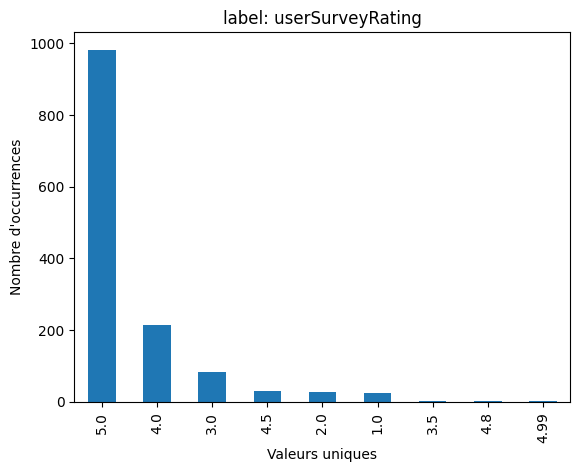

In [16]:
labels.userSurveyRating.value_counts().plot.bar()
plt.xlabel("Valeurs uniques")
plt.ylabel("Nombre d'occurrences")
plt.title("label: userSurveyRating")
plt.show()

En moyenne l'utilisateur a bien noté le chatbot.

In [17]:
labels.wizardSurveyTaskSuccessful.value_counts()

True     1287
False      82
Name: wizardSurveyTaskSuccessful, dtype: int64

82 comunication avec le chatbot n'a pas aider l'utilisateur.

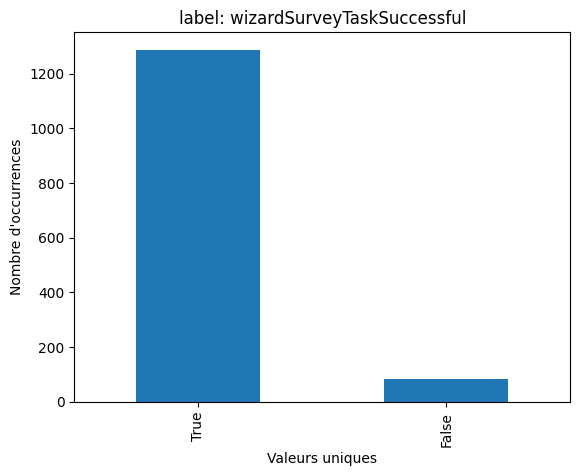

In [18]:
labels.wizardSurveyTaskSuccessful.value_counts().plot.bar()
plt.xlabel("Valeurs uniques")
plt.ylabel("Nombre d'occurrences")
plt.title("label: wizardSurveyTaskSuccessful")
plt.show()

### turns
- author: The author of the message in a dialogue. i.e. “user” or “wizard”.
- text: The sentence that the author uttered. It is the exact text that the author of a turn said. E.g. “text”: “Consider it done. Have a great trip!”.
- labels: JSON object which has three keys: 
    - active_frame: id of the currently active frame.
    - acts: the dialogue acts for the current utterance. Each act has a **name** and arguments **args**.
        - name: name of the dialogue act (offer or inform)
        - args: contain the optional slot types (key) and slot values (val).
    An act contains a ref tag whenever a user or wizard refers to a past frame. 
    - acts_without_refs: similar to the acts except that they do not have these ref tags.
    We define the frame tracking task as the task that takes as input the acts_without_refs and outputs the acts.
- timestamp: Unix timestamp denoting the time at which the current turn occurred.
- frames: List of frames up to the current turn. Each frame has the following keys: frame_id, frame_parent_id, requests, binary_questions, compare_requests, and info.
- db: It can only occur during a wizard’s turn. It is a list of search queries made by the wizard with the associated list of search results. E.g. “db”: {“search”: [{“ORIGIN_CITY”: “Montreal”}], “result”: []}

In [19]:
#data.turns[discussion number][index_discusion][dictionary_values: author, text...]
data.turns

0       [{'text': 'I'd like to book a trip to Atlantis...
1       [{'text': 'Hello, I am looking to book a vacat...
2       [{'text': 'Hello there i am looking to go on a...
3       [{'text': 'Hi I'd like to go to Caprica from B...
4       [{'text': 'Hello, I am looking to book a trip ...
                              ...                        
1364    [{'text': 'Hi I've got 9 days free and I'm loo...
1365    [{'text': 'I need to get to Fortaleza on Septe...
1366    [{'text': 'We're finally going on vacation isn...
1367    [{'text': 'Hi there, I'm looking for a place t...
1368    [{'text': 'I need to book a trip for the whole...
Name: turns, Length: 1369, dtype: object

Let us look only for the first first turn, in order to understand it better.

In [20]:
first_turn = data.turns[0]

In [21]:
first_turn[0]['author']

'user'

In [22]:
first_turn[1]['author']

'wizard'

In [23]:
first_turn[0]['text']

"I'd like to book a trip to Atlantis from Caprica on Saturday, August 13, 2016 for 8 adults. I have a tight budget of 1700."

In [24]:
first_turn[1]['text']

'Hi...I checked a few options for you, and unfortunately, we do not currently have any trips that meet this criteria.  Would you like to book an alternate travel option?'

The turn consists of the discussion between a user and a wizzard.

In [25]:
first_turn[0]['labels']

{'acts': [{'args': [{'val': 'book', 'key': 'intent'}], 'name': 'inform'},
  {'args': [{'val': 'Atlantis', 'key': 'dst_city'},
    {'val': 'Caprica', 'key': 'or_city'},
    {'val': 'Saturday, August 13, 2016', 'key': 'str_date'},
    {'val': '8', 'key': 'n_adults'},
    {'val': '1700', 'key': 'budget'}],
   'name': 'inform'}],
 'acts_without_refs': [{'args': [{'val': 'book', 'key': 'intent'}],
   'name': 'inform'},
  {'args': [{'val': 'Atlantis', 'key': 'dst_city'},
    {'val': 'Caprica', 'key': 'or_city'},
    {'val': 'Saturday, August 13, 2016', 'key': 'str_date'},
    {'val': '8', 'key': 'n_adults'},
    {'val': '1700', 'key': 'budget'}],
   'name': 'inform'}],
 'active_frame': 1,
 'frames': [{'info': {'intent': [{'val': 'book', 'negated': False}],
    'budget': [{'val': '1700.0', 'negated': False}],
    'dst_city': [{'val': 'Atlantis', 'negated': False}],
    'or_city': [{'val': 'Caprica', 'negated': False}],
    'str_date': [{'val': 'august 13', 'negated': False}],
    'n_adults': 

In [26]:
first_turn[0]['labels']['acts']

[{'args': [{'val': 'book', 'key': 'intent'}], 'name': 'inform'},
 {'args': [{'val': 'Atlantis', 'key': 'dst_city'},
   {'val': 'Caprica', 'key': 'or_city'},
   {'val': 'Saturday, August 13, 2016', 'key': 'str_date'},
   {'val': '8', 'key': 'n_adults'},
   {'val': '1700', 'key': 'budget'}],
  'name': 'inform'}]

In [27]:
first_turn[1]['labels']['frames'][0]['info']

{'intent': [{'val': 'book', 'negated': False}],
 'budget': [{'val': '1700.0', 'negated': False}],
 'dst_city': [{'val': 'Atlantis', 'negated': False}],
 'or_city': [{'val': 'Caprica', 'negated': False}],
 'str_date': [{'val': 'august 13', 'negated': False}],
 'n_adults': [{'val': '8', 'negated': False}],
 'NO_RESULT': [{'val': True, 'negated': False}]}

In [28]:
first_turn[0]['timestamp']

1471272019730.0

In [29]:
first_turn[1]['timestamp']

1471272381399.0

In [30]:
first_turn[1]['db']

{'result': [[{'trip': {'returning': {'duration': {'hours': 0, 'min': 51},
      'arrival': {'hour': 10, 'year': 2016, 'day': 24, 'min': 51, 'month': 8},
      'departure': {'hour': 10,
       'year': 2016,
       'day': 24,
       'min': 0,
       'month': 8}},
     'seat': 'ECONOMY',
     'leaving': {'duration': {'hours': 0, 'min': 51},
      'arrival': {'hour': 0, 'year': 2016, 'day': 16, 'min': 51, 'month': 8},
      'departure': {'hour': 0, 'year': 2016, 'day': 16, 'min': 0, 'month': 8}},
     'or_city': 'Porto Alegre',
     'duration_days': 9},
    'price': 2118.81,
    'hotel': {'gst_rating': 7.15,
     'vicinity': [],
     'name': 'Scarlet Palms Resort',
     'country': 'Brazil',
     'amenities': ['FREE_BREAKFAST', 'FREE_PARKING', 'FREE_WIFI'],
     'dst_city': 'Goiania',
     'category': '3.5 star hotel'}},
   {'trip': {'returning': {'duration': {'hours': 2, 'min': 37},
      'arrival': {'hour': 12, 'year': 2016, 'day': 10, 'min': 37, 'month': 8},
      'departure': {'hour': 1

Reading and understanding turns:

In [31]:
data['turns']

0       [{'text': 'I'd like to book a trip to Atlantis...
1       [{'text': 'Hello, I am looking to book a vacat...
2       [{'text': 'Hello there i am looking to go on a...
3       [{'text': 'Hi I'd like to go to Caprica from B...
4       [{'text': 'Hello, I am looking to book a trip ...
                              ...                        
1364    [{'text': 'Hi I've got 9 days free and I'm loo...
1365    [{'text': 'I need to get to Fortaleza on Septe...
1366    [{'text': 'We're finally going on vacation isn...
1367    [{'text': 'Hi there, I'm looking for a place t...
1368    [{'text': 'I need to book a trip for the whole...
Name: turns, Length: 1369, dtype: object

Les clés qui nous intéresse dans le cadre de ce MVP sont :

 - `or_city` (Ville de départ)
 - `dst_city` (Ville de destination)
 - `str_date` (Date aller souhaitée du vol)
 - `end_date` (Date retour souhaitée du vol)
 - `budget` (Budget maximum pour le prix total des billets)

In [32]:
data.turns[0][6]['labels']['frames'][0]['info']

{'intent': [{'val': 'book', 'negated': False}],
 'budget': [{'val': '1700.0', 'negated': False}],
 'dst_city': [{'val': 'Atlantis', 'negated': False}],
 'or_city': [{'val': 'Caprica', 'negated': True}],
 'str_date': [{'val': 'august 13', 'negated': False}],
 'n_adults': [{'val': '8', 'negated': False}]}

In [33]:
# Boucle sur les tours de la donnée brute
for index, turn in enumerate(data.loc[0:0,"turns"]):
    # turn est une discution entre une utilisateur et une wizard
    # Imprimer une ligne vide
    print()
    print("DISCUSION # {0}".format(index))
    print()

    # Initialiser un dictionnaire pour les faits connus
    known_facts = {}

    # Boucle sur les messages de chaque tour
    for i, frame in enumerate(turn):
        # Imprimer l'auteur et le texte du message
        print(f'{i} - { frame["author"] } says : \n"{ frame["text"] }"')

        # Mettre à jour les faits connus avec les nouvelles informations
        # Boucle sur les frames dans les messages
        for f in frame["labels"]["frames"]:
            # Boucle sur les informations dans chaque frame
            for info_key, info in f["info"].items():
                # Si la valeur n'est pas négative, ajouter l'info_key et la dernière valeur à known_facts
                if not info[-1]["negated"]:
                    known_facts[info_key] = info[-1]["val"]
                # Si la valeur est négative, ajouter l'info_key à known_facts avec None comme valeur
                else:
                    known_facts[info_key] = None


        # Imprimer les faits connus
        print(f"Known facts : \n{known_facts}")
        print()


DISCUSION # 0

0 - user says : 
"I'd like to book a trip to Atlantis from Caprica on Saturday, August 13, 2016 for 8 adults. I have a tight budget of 1700."
Known facts : 
{'intent': 'book', 'budget': '1700.0', 'dst_city': 'Atlantis', 'or_city': 'Caprica', 'str_date': 'august 13', 'n_adults': '8'}

1 - wizard says : 
"Hi...I checked a few options for you, and unfortunately, we do not currently have any trips that meet this criteria.  Would you like to book an alternate travel option?"
Known facts : 
{'intent': 'book', 'budget': '1700.0', 'dst_city': 'Atlantis', 'or_city': 'Caprica', 'str_date': 'august 13', 'n_adults': '8', 'NO_RESULT': True}

2 - user says : 
"Yes, how about going to Neverland from Caprica on August 13, 2016 for 5 adults. For this trip, my budget would be 1900."
Known facts : 
{'intent': 'book', 'budget': '1900.0', 'dst_city': 'Neverland', 'or_city': 'Caprica', 'str_date': 'august 13', 'n_adults': '5', 'NO_RESULT': True}

3 - wizard says : 
"I checked the availabilit

In [34]:
import importlib
import utils as ult

importlib.reload(ult)

extractor = utl.UtteranceExtractor(data.turns)
extractor.extract()

In [35]:
len(extractor.utterances)

4376

In [36]:
extractor.utterances[0]

{'text': "I'd like to book a trip to Atlantis from Caprica on Saturday, August 13, 2016 for 8 adults. I have a tight budget of 1700.",
 'intent_name': 'BookFlight',
 'entity_labels': [{'entity_name': 'dst_city',
   'start_char_index': 27,
   'end_char_index': 35},
  {'entity_name': 'or_city', 'start_char_index': 41, 'end_char_index': 48},
  {'entity_name': 'str_date', 'start_char_index': 52, 'end_char_index': 77},
  {'entity_name': 'budget', 'start_char_index': 117, 'end_char_index': 121}]}

In [37]:
# Getting the true labels from one utterace
id_utt = 0
y = extractor.getEntitiesFromUtterances(0)
y

{'dst_city': 'Atlantis',
 'or_city': 'Caprica',
 'str_date': 'Saturday, August 13, 2016',
 'budget': '1700'}

In [38]:
utt = extractor.utterances[0]
utt

{'text': "I'd like to book a trip to Atlantis from Caprica on Saturday, August 13, 2016 for 8 adults. I have a tight budget of 1700.",
 'intent_name': 'BookFlight',
 'entity_labels': [{'entity_name': 'dst_city',
   'start_char_index': 27,
   'end_char_index': 35},
  {'entity_name': 'or_city', 'start_char_index': 41, 'end_char_index': 48},
  {'entity_name': 'str_date', 'start_char_index': 52, 'end_char_index': 77},
  {'entity_name': 'budget', 'start_char_index': 117, 'end_char_index': 121}]}

In [39]:
y_true = {entity['entity_name']: utt['text'][entity['start_char_index']:entity['end_char_index']]
                for entity in utt['entity_labels']}
y_true

{'dst_city': 'Atlantis',
 'or_city': 'Caprica',
 'str_date': 'Saturday, August 13, 2016',
 'budget': '1700'}

Having the tru labels we will use them to make comparisons to the predicted labels using the LUIS application.

In [40]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(extractor.utterances, test_size=0.2, shuffle=True, random_state=3)

In [41]:
len(train_data)

3500

In [42]:
len(test_data)

876

In [16]:
import pickle
import os

def write_data(filename, data):
    """
        writing a file .pkl that contains the some data
    """
    # verify if the file does not exist
    if not os.path.isfile(filename):
        with open(filename, "wb") as f:
            pickle.dump(data, f, protocol=pickle.HIGHEST_PROTOCOL)
            print(f"Object saved to {filename} successfully.")
    else:
        print(f"File {filename} already exists. Delete it or choose another file name.")

def load_data(filename):
    if os.path.exists(filename):
        with open(filename, "rb") as f:
            data = pickle.load(f)
        print("Data loaded successfully")
    else:
        data = None
        print("File does not exist")
    return data



train_file_name = 'data/processed/train.pkl'
test_file_name = 'data/processed/test.pkl'

if not os.path.isfile(train_file_name):
    # verify if the file does not exist
    write_data(train_file_name, train_data)
else:
    print('Train data exists')
    train_data = load_data(train_file_name)

if not os.path.isfile(test_file_name):
    # verify if the file does not exist
    write_data(test_file_name, test_data)
else:
    print('Test data exists')
    test_data = load_data(test_file_name)



Train data exists
Data loaded successfully
Test data exists
Data loaded successfully


# LUIS
## Creating the application

In [62]:
NEW_APP = False

In [63]:
import importlib
import luis_helper as luis

importlib.reload(luis)

<module 'luis_helper' from '/Users/bartcus/Documents/GitHub/OC-projects/oc_10/luis_helper.py'>

In [64]:
client = luis.LUISHelper()
if NEW_APP:
    client.create_app()
else:
    app_id = 'c2ad16eb-c106-438c-b487-cfc569117efe'#'60594a38-0766-456f-843f-c46bd30baa98'
    client.load_app(app_id)

In [20]:
#if NEW_APP:
#    prebuilt_entities = ['geographyV2', 'datetimeV2', 'number']
#    client.add_prebuilt_entities(prebuilt_entities)

In [65]:
if NEW_APP:
    client.add_entities_and_features()

In [66]:
# Create intent into the model
if NEW_APP:
    intent_name = "BookFlight"

    client.add_intent(intent_name)

In [67]:
NEW_APP=False
len(test_data)

876

In [68]:
if NEW_APP:
    train_file_name = 'data/processed/train.pkl'
    test_file_name = 'data/processed/test.pkl'

    if not os.path.isfile(train_file_name):
        # verify if the file does not exist
        write_data(train_file_name, train_data)
    else:
        print('Train data exists')
        train_data = load_data(train_file_name)

    if not os.path.isfile(test_file_name):
        # verify if the file does not exist
        write_data(test_file_name, test_data)
    else:
        print('Test data exists')
        test_data = load_data(test_file_name)

In [69]:
if NEW_APP:
    client.add_utterace(train_data)

## Training

In [70]:
if NEW_APP:
    client.train_app()

## Publishing

In [36]:
if NEW_APP:
    client.publish_app()

Start publishing the app...
The app is published.


## Testing if everithing works

In [1]:
#client.test('I would like to book a flight from Lyon to Paris tomorrow at 11pm with a budget of 100 euros')

In [72]:
r = client.get_clientRuntime().prediction.resolve(app_id, 'Book me a flight from Paris to London on 2023 10 january with a return date 11-03-2023 and a budget of 500 euros')

In [73]:
r.top_scoring_intent.intent

'BookFlight'

In [74]:
for entity in r.entities:
    print(entity.entity, entity.type)

500 euros budget
london dst_city
paris or_city
2023 10 january builtin.datetimeV2.date
11-03-2023 builtin.datetimeV2.date
paris builtin.geographyV2.city
london builtin.geographyV2.city
2023 builtin.number
10 builtin.number
11 builtin.number
03 builtin.number
2023 builtin.number
500 builtin.number


## Model evaluation

## How to compute the true values

In [5]:
# Getting 100 examples of test data from utterace to evaluate
tt_utr = test_data[0:10]

In [8]:
def _get_entities_utterances(data: dict) -> dict:
    """Helper function to extract entities from LUIS response"""
    text = data['text']
    y_true = {entity['entity_name']: text[entity['start_char_index']:entity['end_char_index']]
        for entity in data['entity_labels']}
    return y_true

In [9]:
test_data[20]

{'text': 'Ok I would like to go to Melbourne from Santiago Actually it can be any city\nBut on one condition: I want to travel for free\nMy guru told me that I could make anything happen if I dreamed hard enough and focused on making it a reality\nSo my dream is to travel for free and you will help make it happen',
 'intent_name': 'BookFlight',
 'entity_labels': [{'entity_name': 'or_city',
   'start_char_index': 25,
   'end_char_index': 34},
  {'entity_name': 'budget', 'start_char_index': 109, 'end_char_index': 124}]}

In [16]:
tt_utr[2]

{'text': 'leave whenever. i should be back for September 11',
 'intent_name': 'BookFlight',
 'entity_labels': [{'entity_name': 'end_date',
   'start_char_index': 37,
   'end_char_index': 49}]}

In [18]:
_get_entities_utterances(tt_utr[2])

{'end_date': 'September 11'}

In [21]:
y_true = _get_entities_utterances(tt_utr[2])

## How to compute the predicted values

In [9]:
clientRuntime = client.get_clientRuntime()

request = { "query" : 'I would like to book a flight from Lyon to Paris tomorrow at 11pm with a budget of 100 euros' }

response = clientRuntime.prediction.get_slot_prediction(app_id, slot_name="Production", prediction_request=request)

In [28]:
{entity_key:entity_val[0] for entity_key, entity_val in response.prediction.entities.items()}

{'or_city': 'Lyon',
 'dst_city': 'Paris',
 'geographyV2': {'value': 'Paris', 'type': 'city'},
 'datetimeV2': {'type': 'datetime',
  'values': [{'timex': '2023-02-23T23',
    'resolution': [{'value': '2023-02-23 23:00:00'}]}]},
 'number': 100,
 'budget': '100 euros'}

In [19]:
clientRuntime = client.get_clientRuntime()

request = { "query" : tt_utr[2] }

response = clientRuntime.prediction.get_slot_prediction(app_id, slot_name="Production", prediction_request=request)

{entity_key:entity_val[0] for entity_key, entity_val in response.prediction.entities.items()}

{'end_date': 'September 11',
 'datetimeV2': {'type': 'date',
  'values': [{'timex': 'XXXX-09-11',
    'resolution': [{'value': '2022-09-11'}, {'value': '2023-09-11'}]}]},
 'number': 11}

In [20]:
y_pred = {entity_key:entity_val[0] for entity_key, entity_val in response.prediction.entities.items()}

In [47]:
y_pred

{'end_date': 'September 11',
 'datetimeV2': {'type': 'date',
  'values': [{'timex': 'XXXX-09-11',
    'resolution': [{'value': '2022-09-11'}, {'value': '2023-09-11'}]}]},
 'number': 11}

In [42]:
for key in y_pred.keys():
    _pred = y_pred.get(key, "")
    _true = y_true.get(key, "")
    print(_pred)
    print(_true)

September 11
September 11
{'type': 'date', 'values': [{'timex': 'XXXX-09-11', 'resolution': [{'value': '2022-09-11'}, {'value': '2023-09-11'}]}]}

11



In [74]:
len(train_data)

3500

In [64]:
# Getting 100 examples of test data from utterace to evaluate
tt_utr = test_data[0:3]

In [91]:
# Initialize the LuisEvaluation class
evaluator = luis.LUISEvaluation(client, app_id)

# Evaluate the LUIS model and get the evaluation report
report = evaluator.evaluate(test_data)

# Print the evaluation report
print(report)

([0.0, 0.0, 0.0, 33.33333333333333, 100.0, 0.0, 0.0, 0.0, 66.66666666666666, 100.0, 100.0, 100.0, 66.66666666666666, 100.0, 0.0, 100.0, 50.0, 100.0, 50.0, 100.0, 100.0, 100.0, 100.0, 50.0, 0.0, 100.0, 50.0, 0.0, 66.66666666666666, 0.0, 50.0, 100.0, 50.0, 100.0, 100.0, 100.0, 50.0, 66.66666666666666, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 0.0, 50.0, 100.0, 50.0, 100.0, 66.66666666666666, 0.0, 100.0, 100.0, 100.0, 0.0, 50.0, 0.0, 100.0, 0.0, 100.0, 0.0, 100.0, 100.0, 100.0, 100.0, 100.0, 50.0, 0.0, 50.0, 0.0, 100.0, 75.0, 100.0, 100.0, 50.0, 100.0, 0.0, 100.0, 0.0, 75.0, 100.0, 50.0, 100.0, 0.0, 100.0, 100.0, 100.0, 0.0, 0.0, 100.0, 0.0, 100.0, 0.0, 66.66666666666666, 100.0, 0.0, 100.0, 100.0, 33.33333333333333, 50.0, 100.0, 0.0, 0.0, 0.0, 50.0, 100.0, 0.0, 0.0, 100.0, 0.0, 100.0, 50.0, 100.0, 100.0, 100.0, 100.0, 0.0, 50.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 0.0, 50.0, 100.0, 0.0, 100.0, 0.0, 100.0, 100.0, 50.0, 0.0, 66.66666666666666, 0.0, 100.0, 0.0, 100.0, 66.66666666666666

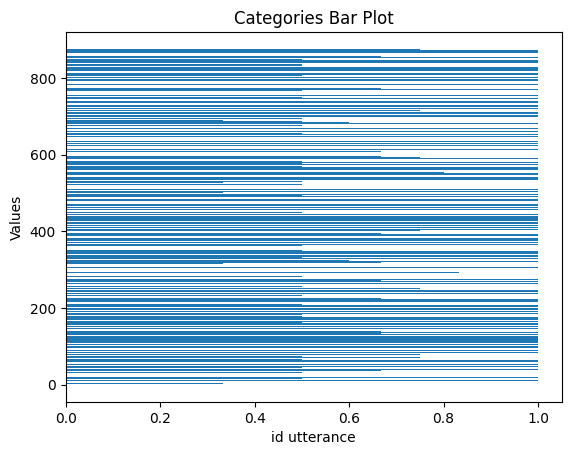

In [110]:
plt.barh(range(0, len(report[0])), report[0]/(np.ones(876)*100))
plt.xlabel('id utterance')
plt.ylabel("Values")
plt.title('Categories Bar Plot')
plt.show()

Based on the test data, we obtain a precision of 59.71% between the predicted model and the real liberalization of the original data. As shown in Figure 3, each utterance has been evaluated. Several utterances were evaluated as having 100% precision. Many of them predict nothing, while others have a middle level of precision. We can examine these three types of utterances by observing them.


0% evaluated prediction

In [111]:
test_data[0]

{'text': 'how about if I leave from Beijing?',
 'intent_name': 'BookFlight',
 'entity_labels': [{'entity_name': 'or_city',
   'start_char_index': 26,
   'end_char_index': 33}]}

In [112]:
evaluator.y_pred[0]

{'geographyV2': {'value': 'Beijing', 'type': 'city'}, 'or_city': 'Beijing?'}

In [113]:
evaluator.y_true[0]

{'or_city': 'Beijing'}

100% evaluated prediction

In [117]:
test_data[4]

{'text': 'Can anything help resurrect my career at this point??? Is there any sadder rung in society than that of the failed writer\nOk you know what, maybe you can help\nGet me to Campinas to San Juan please\nMe, my wife, and my son',
 'intent_name': 'BookFlight',
 'entity_labels': [{'entity_name': 'or_city',
   'start_char_index': 169,
   'end_char_index': 177},
  {'entity_name': 'dst_city', 'start_char_index': 181, 'end_char_index': 189}]}

In [118]:
evaluator.y_pred[4]

{'or_city': 'Campinas',
 'geographyV2': {'value': 'Campinas', 'type': 'city'},
 'dst_city': 'San Juan'}

In [119]:
evaluator.y_true[4]

{'or_city': 'Campinas', 'dst_city': 'San Juan'}

66.66% evaluated prediction

In [121]:
test_data[8]

{'text': 'Can I take my wife and son from Madrid to Santos for 4800??',
 'intent_name': 'BookFlight',
 'entity_labels': [{'entity_name': 'or_city',
   'start_char_index': 32,
   'end_char_index': 38},
  {'entity_name': 'dst_city', 'start_char_index': 42, 'end_char_index': 48},
  {'entity_name': 'budget', 'start_char_index': 53, 'end_char_index': 57}]}

In [122]:
evaluator.y_pred[8]

{'or_city': 'Madrid',
 'dst_city': 'Santos',
 'geographyV2': {'value': 'Santos', 'type': 'city'},
 'number': 4800,
 'budget': '4800??'}

In [123]:
evaluator.y_true[8]

{'or_city': 'Madrid', 'dst_city': 'Santos', 'budget': '4800'}